In [1]:
import numpy as np
from scipy import optimize as opt
import matplotlib.pyplot as plt
import time

## Exercise 3.2

In [2]:
def get_L(nvec):
    nvec = np.array(nvec)
    return np.sum(nvec)

def get_K(bvec):
    bvec = np.array(bvec)
    return np.sum(bvec)

def get_r(L, K, params):
    
    # unpack params
    β, σ, nvec, L, A, α, δ, SS_tol = params
    
    r = α * A * np.sign(L/K) * np.abs(L/K)**(1-α) - δ
    return r

def get_w(L, K, params):
    
    # unpack params
    β, σ, nvec, L, A, α, δ, SS_tol = params
    
    w = (1-α) * A * np.sign(L/K) * np.abs(K/L)**α
    return w

def get_c(bvec, params):
    
    # unpack params
    β, σ, nvec, L, A, α, δ, SS_tol = params
    
    # set the extended savings vector
    bvec = np.array(bvec)
    bvec = np.hstack((0, bvec))
    bvec = np.hstack((bvec, 0))
    
    # get variables
    L = get_L(nvec)
    K = get_K(bvec)
    w = get_w(L, K, params)
    r = get_r(L, K, params)
    
    cvec = np.zeros(len(nvec))
    
    for i in range(len(nvec)):
        cvec[i] = w * nvec[i] + (1 + r) * bvec[i] - bvec[i + 1]

    return cvec

def get_uprime(c, params):
    
    # unpack params
    β, σ, nvec, L, A, α, δ, SS_tol = params
    
    mu = np.sign(c) * np.abs(c)**(-σ)
    
    return mu

def get_Y(L, K, params):
    
    # unpack params
    β, σ, nvec, L, A, α, δ, SS_tol = params
    
    
    Y = A * K**α * L**(1 - α)
    return Y

def Euler(bvec, *params):
    
    # unpack params
    β, σ, nvec, L, A, α, δ, SS_tol = params
    
    
    
    # get variables
    L = get_L(nvec)
    K = get_K(bvec)
    w = get_w(L, K, params)
    r = get_r(L, K, params)
    cvec = get_c(bvec, params)
    
    # initiate a vector of all equations
    Eul_equs = np.zeros(len(nvec)-1)
    
    for i in range(len(nvec)-1):
        mui = get_uprime(cvec[i], params)
        muip = get_uprime(cvec[i+1], params)
        Eul_equs[i] = β * (1 + r) * muip - mui

    return Eul_equs

In [3]:
def get_SS(params, bvec_guess, SS_graphs = True):
    
    # unpack params
    β, σ, nvec, L, A, α, δ, SS_tol = params
    
    
    ss_time = -time.time()
    
    b_ss = opt.fsolve(Euler, bvec_guess, args = (params), xtol = SS_tol)
    
    ss_time += time.time()
    
    # get all the steady state variables
    K_ss = get_K(b_ss)
    w_ss = get_w(L, K_ss, params)
    r_ss = get_r(L, K_ss, params)
    c_ss = get_c(b_ss, params)
    Y_ss = get_Y(L, K_ss, params)
    C_ss = np.sum(c_ss)
    EulErr_ss = Euler(b_ss, *params)
    RCerr_ss = Y_ss - C_ss - δ * K_ss
    
    if SS_graphs == True:
        plt.figure(figsize = (7,7))
        plt.plot(np.arange(len(nvec)-1), b_ss, '-', label = 'savings')
        plt.plot(np.arange(len(nvec)), c_ss, '-', label = 'consumption')
        plt.xlabel('age')
        plt.ylabel('savings and consumption')
        plt.title('savings and consumption vs. age')
        plt.legend()
        plt.grid()
        plt.show()
    
    steady_state = dict({'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss, 
                'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
                'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
                'ss_time': ss_time})
    
    return steady_state

### 2.2 a and b

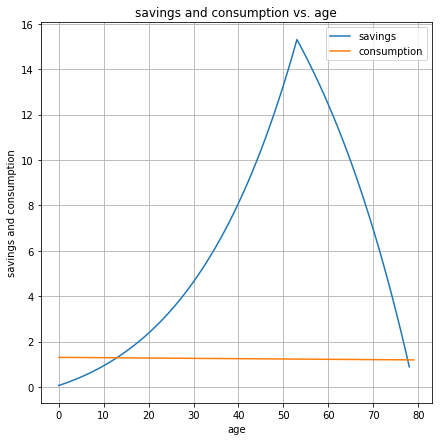

{'b_ss': array([ 0.06305282,  0.12998531,  0.20094374,  0.27607994,  0.35555157,
         0.43952227,  0.52816194,  0.62164696,  0.72016043,  0.82389243,
         0.93304031,  1.04780892,  1.16841095,  1.29506718,  1.42800683,
         1.56746784,  1.71369724,  1.86695149,  2.02749681,  2.19560959,
         2.37157674,  2.55569615,  2.74827704,  2.94964042,  3.16011956,
         3.38006044,  3.60982222,  3.84977776,  4.10031417,  4.36183327,
         4.63475225,  4.91950419,  5.21653868,  5.52632248,  5.84934012,
         6.18609462,  6.5371082 ,  6.90292297,  7.28410172,  7.68122872,
         8.09491049,  8.52577671,  8.97448106,  9.44170213,  9.92814442,
        10.43453928, 10.96164595, 11.51025261, 12.08117753, 12.67527015,
        13.29341232, 13.93651952, 14.60554212, 15.30146677, 14.93260314,
        14.55106182, 14.1563578 , 13.74798761, 13.32542855, 12.88813801,
        12.43555269, 11.9670878 , 11.48213627, 10.98006786, 10.46022833,
         9.92193847,  9.36449317,  8.787160

In [4]:
def get_nvec1(S):
    nvec = np.ones(S)
    for i in range(S):
        if i > np.round(2*S/3):
            nvec[i] = 0.2

    return nvec

def params1(S):
    periods = 80/S
    β = 0.96**periods
    σ = 3
    nvec = get_nvec1(S)
    L = get_L(nvec)
    A = 1
    α = 0.35
    δ = 1 - (1 - 0.05)**periods
    SS_tol = 1e-8
    
    params = β, σ, nvec, L, A, α, δ, SS_tol
    
    return params

bvec_guess = np.ones(79) * 0.1

ss1 = get_SS(params1(80), bvec_guess)
ss1

### 2.2 c

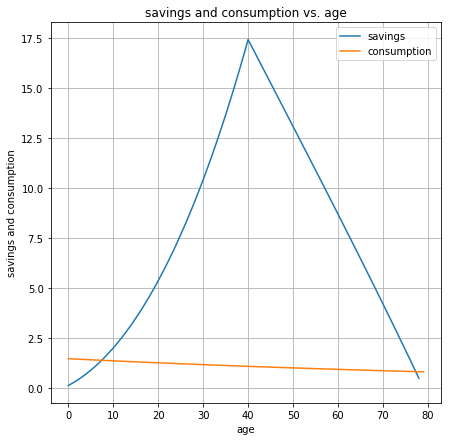

{'b_ss': array([ 0.11348275,  0.24005496,  0.37987077,  0.53308773,  0.69986689,
         0.88037284,  1.0747738 ,  1.28324164,  1.50595197,  1.74308418,
         1.99482154,  2.26135123,  2.54286442,  2.83955636,  3.15162639,
         3.47927809,  3.82271928,  4.18216214,  4.55782326,  4.94992373,
         5.35868922,  5.78435003,  6.2271412 ,  6.68730259,  7.16507895,
         7.66072   ,  8.17448055,  8.70662056,  9.25740521,  9.82710504,
        10.41599602, 11.02435963, 11.65248297, 12.30065888, 12.96918599,
        13.65836887, 14.3685181 , 15.09995041, 15.85298874, 16.6279624 ,
        17.42520715, 16.99019573, 16.55535744, 16.12063424, 15.68596749,
        15.25129796, 14.81656579, 14.38171048, 13.94667089, 13.51138522,
        13.07579099, 12.63982501, 12.20342339, 11.76652152, 11.32905403,
        10.89095481, 10.45215695, 10.01259276,  9.57219373,  9.13089052,
         8.68861296,  8.24528998,  7.80084965,  7.35521913,  6.90832464,
         6.46009148,  6.01044396,  5.559305

In [5]:
def get_nvec2(S):
    nvec = np.ones(S)
    for i in range(S):
        if i > np.round(S/2):
            nvec[i] = 0.2

    return nvec

def params2(S):
    periods = 80/S
    β = 0.96**periods
    σ = 3
    nvec = get_nvec2(S)
    L = get_L(nvec)
    A = 1
    α = 0.35
    δ = 1 - (1 - 0.05)**periods
    SS_tol = 1e-8
    
    params = β, σ, nvec, L, A, α, δ, SS_tol
    
    return params

bvec_guess = np.ones(79) * 0.1

ss1 = get_SS(params2(80), bvec_guess)
ss1